In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib.ticker import FuncFormatter

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [2]:
df = pd.read_csv('archive2020/anime.csv',  encoding='UTF-8')

In [3]:
#  type 통일. Music 은 남겼으며 Tv, Series, Movie, Music으로 구성
df.replace(to_replace='ONA', value='Series', inplace=True)
df.replace(to_replace='OVA', value='Series', inplace=True)
df.replace(to_replace='Special', value='Series', inplace=True)

In [4]:
Duration = df['Duration']
# per ep 정제
df['Duration'] = df['Duration'].str.replace('per ep.', '').str.strip()
df['Duration']

0              24 min.
1        1 hr. 55 min.
2              24 min.
3              25 min.
4              23 min.
             ...      
17557          Unknown
17558          Unknown
17559          Unknown
17560          Unknown
17561          Unknown
Name: Duration, Length: 17562, dtype: object

In [5]:
df['Duration'] = df['Duration'].str.replace('per ep.', '').str.strip()

for i, duration in enumerate(df['Duration']):
    if 'hr.' not in duration and 'min.' in duration:
        minutes = int(duration.split('min.')[0].strip())
        df.at[i, 'Duration'] = minutes
        
df['Duration']

0                   24
1        1 hr. 55 min.
2                   24
3                   25
4                   23
             ...      
17557          Unknown
17558          Unknown
17559          Unknown
17560          Unknown
17561          Unknown
Name: Duration, Length: 17562, dtype: object

In [6]:
# 1시간 = 60분으로 바꿔서 정제 완료

for i in range(len(df['Duration'])):
    if isinstance(df['Duration'][i], str) and '1 hr.' in df['Duration'][i]:
        if len(df['Duration'][i]) >= 7:  # Check if the string is long enough
            minutes = int(df['Duration'][i][-7] + df['Duration'][i][-6])
            df['Duration'][i] = 60 + minutes


In [7]:
# 두시간 정제 완료

for i in range(len(df['Duration'])):
    if isinstance(df['Duration'][i], str) and '2 hr.' in df['Duration'][i]:
        if len(df['Duration'][i]) >= 7:  # Check if the string is long enough
            minutes = int(df['Duration'][i][-7] + df['Duration'][i][-6])
            df['Duration'][i] = 120 + minutes

In [8]:
# 정확히 1시간, 2시간 인 애들 정제 
for i in range(len(df['Duration'])):
    if df['Duration'][i] == '2 hr.':
        df['Duration'][i] = 120
    elif df['Duration'][i] == '1 hr.':
        df['Duration'][i] = 60        


In [9]:
# 초 = 1분으로 정제 완 (1로 정제)

for i in range(len(df['Duration'])):
    if isinstance(df['Duration'][i], str) and 'sec' in df['Duration'][i]:
        df['Duration'][i] = 1

In [10]:
# unknown = nan처리

for i in range(len(df['Duration'])):
    if df['Duration'][i] == 'Unknown':
        df.at[i, 'Duration'] = np.nan

### ====== 정수로 정제된 df['Duration'] 완료 ============

### categorize 기준

ca1: 1분 미만(0<i<2)

ca2: 30분 미만(2<=i<30)

ca3: 60분미만( 30 <= i < 60)

ca4: 90분 미만( 60 <= i < 90) 

ca5: 120분 미만( 90 < = i < 120) 

ca6: 그 이상

In [11]:
ca1 = []
ca2 = []
ca3 = []
ca4 = []
ca5 = []
ca6 = []

for i in df['Duration']:
    if 0 < i <2:
        ca1.append(i)
    elif 2<= i < 30:
        ca2.append(i)
    elif 30<= i < 60:
        ca3. append(i)
        
    elif 60 <= i < 90:
        ca4. append(i)
    elif 90<= i < 120:
        ca5. append(i)
    elif i >= 120:
        ca6.append(i)
        
        
CT1 = len(ca1)
CT2 = len(ca2)
CT3 = len(ca3)
CT4 = len(ca4)
CT5 = len(ca5)
CT6 = len(ca6)

In [12]:
# PtW = Plan to watch
df['PtW']= df['Plan to Watch']
df['PtW']

0        329800
1         57964
2        146918
3         33719
4          3394
          ...  
17557       354
17558      6982
17559     11306
17560      1368
17561       304
Name: PtW, Length: 17562, dtype: int64

In [13]:
# result = pd.concat([df['Name'], df['PtW'], df['Duration']], axis=1)
# result = pd.concat([df['PtW'], df['Duration']], axis=1)
result = pd.concat([df['Duration'],df['PtW']], axis=1)
result

,Duration,PtW
0,24,329800
1,115,57964
2,24,146918
3,25,33719
4,23,3394
...,...,...
17557,NaN,354
17558,NaN,6982
17559,NaN,11306
17560,NaN,1368


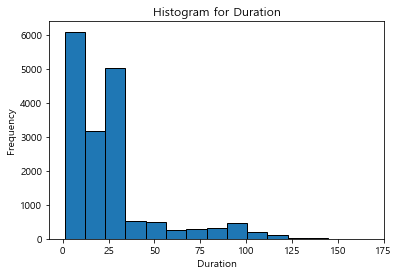

In [14]:
data = df['Duration']

# 히스토그램 그리기
plt.hist(data, bins=15, edgecolor='black')  # bins는 구간 개수, edgecolor는 히스토그램 막대의 테두리 색

# 그래프 제목 및 라벨 추가
plt.title('Histogram for Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')

# 그래프 보이기
plt.show()

<BarContainer object of 6 artists>

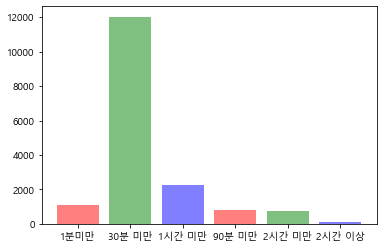

In [15]:
# 바 그래프: 시간 별 분포도

labels = ['1분미만','30분 미만','1시간 미만','90분 미만','2시간 미만', '2시간 이상']
values = [CT1, CT2, CT3, CT4, CT5, CT6]
colors = ['r','g','b']

plt.bar(labels, values, color=colors, alpha=0.5) ## 막대그래프 색과 투명도 조절

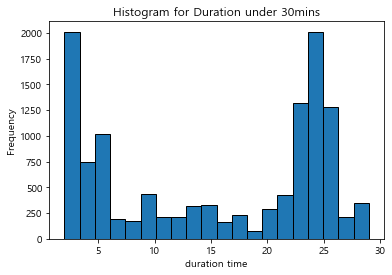

In [16]:
# 30분 미만 작품 어떤 것이 가장 많은가

plt.hist(ca2, bins=20, edgecolor='black')  # bins는 구간 개수, edgecolor는 히스토그램 막대의 테두리 색

# 그래프 제목 및 라벨 추가
plt.title('Histogram for Duration under 30mins')
plt.xlabel('duration time')
plt.ylabel('Frequency')

# 그래프 보이기
plt.show()

In [17]:
# 값에 숫자가 아닌 분류 할 것
df['ca_dura'] = df ['Duration']

def categorize_duration(duration):
    if 0 < duration < 15:
        return 'ca1'
    elif 15 <= duration < 30:
        return 'ca2'
    elif 30 <= duration < 60:
        return 'ca3'
    elif 60 <= duration < 120:
        return 'ca4'
    elif duration >= 120:
        return 'ca5'
    else:
        return 'Unknown'

df['ca_dura'] = df['Duration'].apply(categorize_duration)

print(df['ca_dura'])

0            ca2
1            ca4
2            ca2
3            ca2
4            ca2
          ...   
17557    Unknown
17558    Unknown
17559    Unknown
17560    Unknown
17561    Unknown
Name: ca_dura, Length: 17562, dtype: object


In [18]:
# 분류한 plan to watch를 Plan To watch로 지정해준다 (PTW)
df['ca_PtW'] = df['PtW']

In [19]:
# Plan to watch 개수 카테고라이징 하기.

def categorize_ca_PtW(value):
    if 0 < value < 1000:
        return 'lv.1'
    
    elif 1000 <= value < 5000:
        return 'lv.2'
    
    elif 5000 <= value < 10000:
        return 'lv.3'
    
    elif 10000 <= value < 30000:
        return 'lv.4'
    
    elif 30000 <= value < 60000:
        return 'lv.5'
    
    elif 60000 <= value < 100000:
        return 'lv.6'
    elif 100000 <= value :
        return 'lv.7'
    
    else:
        return 'Unknown'


df['ca_PtW'] = df['ca_PtW'].apply(categorize_ca_PtW)


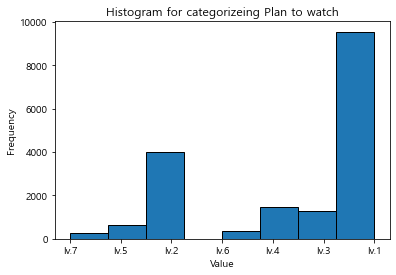

In [20]:
# 분류를 확인하기 위한 히스토그램
# 히스토그램 그리기
plt.hist(df['ca_PtW'], bins=8, edgecolor='black')
# bins는 구간 개수, edgecolor는 히스토그램 막대의 테두리 색

# 그래프 제목 및 라벨 추가
plt.title('Histogram for categorizeing Plan to watch')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 그래프 보이기
plt.show()

In [21]:
# 데이터 추출을 위한 표 병합
result = pd.concat([df['ca_dura'],df['ca_PtW']], axis=1)
result

,ca_dura,ca_PtW
0,ca2,lv.7
1,ca4,lv.5
2,ca2,lv.7
3,ca2,lv.5
4,ca2,lv.2
...,...,...
17557,Unknown,lv.1
17558,Unknown,lv.3
17559,Unknown,lv.4
17560,Unknown,lv.2


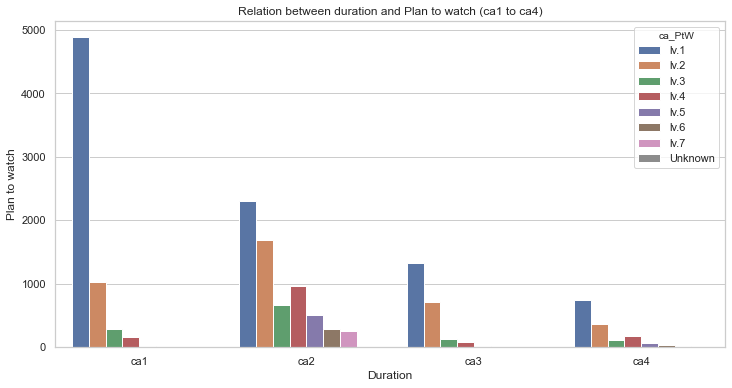

In [22]:
# plan to watch 개수  정렬
#길이대비 plan to watch는 어떤지 관찰. ca2가 균등하게 plan to watch가 분포되어있다. 

ca_order = ['ca1', 'ca2', 'ca3', 'ca4']
filtered_result = result[result['ca_dura'].isin(ca_order)]

sns.set(style="whitegrid")
lv_order = ['lv.1', 'lv.2', 'lv.3', 'lv.4', 'lv.5', 'lv.6', 'lv.7', 'Unknown']

plt.figure(figsize=(12, 6))
sns.countplot(x='ca_dura', hue='ca_PtW', data=filtered_result, hue_order=lv_order, order=ca_order)

plt.title('Relation between duration and Plan to watch (ca1 to ca4)')
plt.xlabel('Duration')
plt.ylabel('Plan to watch')


plt.show()

### 시청등급과 Plan to wtach 의 관계

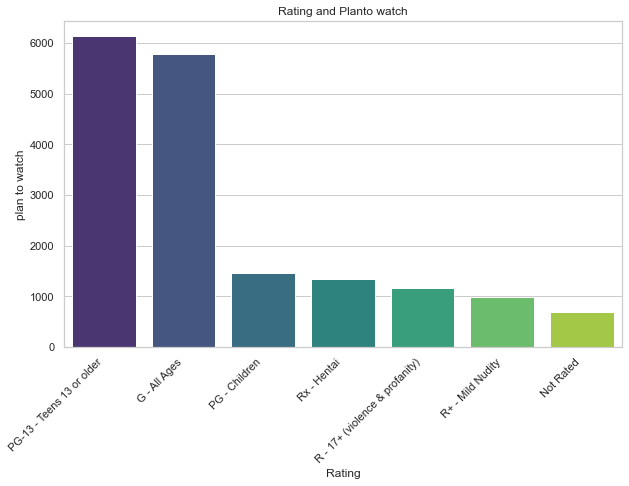

In [23]:
# unknown이 Not rated로 바뀐 상태 
# 어느 등급이 가장 빈도가 높지?
# 시청등급에 따른 plan to watch 비율

df['Rating'] = df['Rating'].replace('Unknown', 'Not Rated')
rating_counts = df['Rating'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Rating and Planto watch')
plt.xlabel('Rating')
plt.ylabel('plan to watch')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [24]:
result2 = pd.concat([df['Rating'],df['PtW']], axis=1)
result2

,Rating,PtW
0,R - 17+ (violence & profanity),329800
1,R - 17+ (violence & profanity),57964
2,PG-13 - Teens 13 or older,146918
3,PG-13 - Teens 13 or older,33719
4,PG - Children,3394
...,...,...
17557,Not Rated,354
17558,Not Rated,6982
17559,R - 17+ (violence & profanity),11306
17560,PG-13 - Teens 13 or older,1368


### ============ 에피소드 수와 인기도 ======================

- 5화 아래: shor series
- 5화 이상 10화 미만 : middle short series
- 10화 이상 20화 미만: anime series
- 20화 이상 50화 미만 : middle long anime series
- 50화 이상 100화 미만: long anime series
- 100화 이상: super long series

In [25]:
# 에피소드 str -> int 정제

df['pu_Epi'] = df['Episodes']
df['pu_Epi'] = df['pu_Epi'].replace('Unknown', np.nan)
df['pu_Epi']

0         26
1          1
2         26
3         26
4         52
        ... 
17557    NaN
17558    NaN
17559    NaN
17560    NaN
17561    NaN
Name: pu_Epi, Length: 17562, dtype: object

In [26]:
for i in range(len(df['pu_Epi'])):
    if not pd.isna(df['pu_Epi'][i]):
        df['pu_Epi'][i] = int(df['pu_Epi'][i])
        
type(df['pu_Epi'][0])

int

In [27]:
#  정제 완료
df['pu_Epi']

0         26
1          1
2         26
3         26
4         52
        ... 
17557    NaN
17558    NaN
17559    NaN
17560    NaN
17561    NaN
Name: pu_Epi, Length: 17562, dtype: object

In [28]:
for i in range(len(df['pu_Epi'])):
    
    if 0 < df['pu_Epi'][i] <= 5:
        df['pu_Epi'][i] = 'short series'
        
    elif 5 <= df['pu_Epi'][i] < 10:
        df['pu_Epi'][i] = 'middle short series'
        
    elif 10 <= df['pu_Epi'][i] < 20:
        df['pu_Epi'][i] = 'anime series'
        
    elif 20 <= df['pu_Epi'][i] < 50:
        df['pu_Epi'][i] = 'middle long anime series'
        
    elif 50 <= df['pu_Epi'][i] < 100:
        df['pu_Epi'][i] = 'long anime series'
        
    elif df['pu_Epi'][i] >= 100:
        df['pu_Epi'][i] = 'super long series'

print(df['pu_Epi'])

0        middle long anime series
1                    short series
2        middle long anime series
3        middle long anime series
4               long anime series
                   ...           
17557                         NaN
17558                         NaN
17559                         NaN
17560                         NaN
17561                         NaN
Name: pu_Epi, Length: 17562, dtype: object


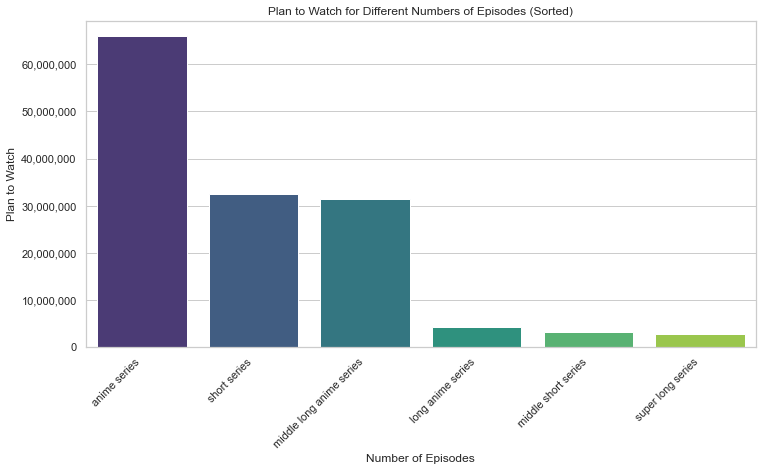

In [29]:
# 에피소드 수 대비 plan to watch
# 평범한 한 시리즈의 애니메이션이 가장 많다


sorted_df = df.groupby('pu_Epi')['PtW'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='pu_Epi', y='PtW', data=sorted_df, palette='viridis')
plt.title('Plan to Watch for Different Numbers of Episodes (Sorted)')
plt.xlabel('Number of Episodes')
plt.ylabel('Plan to Watch')
plt.xticks(rotation=45, ha='right')

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

In [30]:
result3 = pd.concat([df['pu_Epi'],df['Completed']], axis=1)
result3

,pu_Epi,Completed
0,middle long anime series,718161
1,short series,208333
2,middle long anime series,343492
3,middle long anime series,46165
4,long anime series,7314
...,...,...
17557,NaN,0
17558,NaN,0
17559,NaN,0
17560,NaN,2


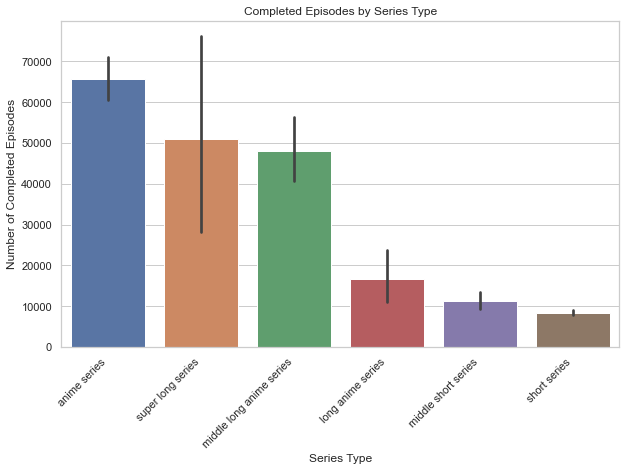

In [31]:
# 작품의 에피소드 수 대비 사람들의 완주 비율
# 전반적으로 애니메이션이 완주비율이 높지만 초장편의 완주율도 괄목할만 함. 내용만 좋으면, 완전 긴 내용이나, 애니메이션 시리즈들이 주로 롱런한다

order = df.groupby('pu_Epi')['Completed'].mean().sort_values(ascending=False).index

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='pu_Epi', y='Completed', data=df, order=order)

# Rotate x-axis labels diagonally
plt.xticks(rotation=45, ha='right')

plt.title('Completed Episodes by Series Type')
plt.xlabel('Series Type')
plt.ylabel('Number of Completed Episodes')
plt.show()

## 2023 데이터 분석

In [32]:
df3 = pd.read_csv('archive2023/anime-dataset-2023.csv',encoding='UTF-8')
user_df = pd.read_csv('archive2023/users-details-2023.csv',encoding='UTF-8')
score_df = pd.read_csv('archive2023/users-score-2023.csv',encoding='UTF-8')

### =========== Rewatched와  total ranking 병합 ======================

- rewatched 비율 자체가 적기 때문에 binary 처리하였다
- 표 병합하고 겹치는 정보 지우고(user id = mal id ) 다시 보기 비율이 높았던 애니 리스트를 쫙 뽑음

In [33]:
# rewatched 이진화. rewatched 6회 이상부터 1로 표기
user_df['Rewatched'] = user_df['Rewatched'].apply(lambda x: 1 if x > 5 else 0)
print(user_df['Rewatched'])

0         1
1         1
2         1
3         0
4         1
         ..
731285    0
731286    0
731287    0
731288    0
731289    0
Name: Rewatched, Length: 731290, dtype: int64


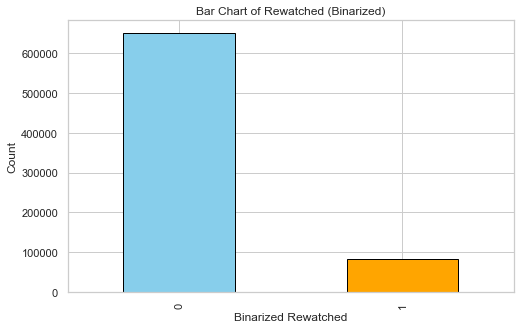

In [34]:
# 유의미한 데이터 확인을 위한 바그래프 

rewatched_counts = user_df['Rewatched'].value_counts()

plt.figure(figsize=(8, 5))
rewatched_counts.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')

plt.title('Bar Chart of Rewatched (Binarized)')
plt.xlabel('Binarized Rewatched')
plt.ylabel('Count')


plt.show()

# 유의미한 데이터가 한 10만명 정도 된다 

In [35]:
# 유저네임과 리와치를 합침
U_Re_df = pd.concat([user_df['Mal ID'],user_df['Username'], user_df['Rewatched']], axis=1)
U_Re_df

,Mal ID,Username,Rewatched
0,1,Xinil,1
1,3,Aokaado,1
2,4,Crystal,1
3,9,Arcane,0
4,18,Mad,1
...,...,...,...
731285,1291083,Dolopa,0
731286,1291085,alenrobnik,0
731287,1291087,Oblongata,0
731288,1291091,Etnota,0


In [36]:
# scoredf와 rewatched 데이터를 합침. 바이너리 처리한 결과 1이 뜬 유저만 남김

rewatched_users = U_Re_df[U_Re_df['Rewatched'] == 1]
merged_data = pd.merge(rewatched_users, score_df, left_on='Mal ID', right_on='user_id', how='inner', suffixes=('_U_Re', '_score'))
print(merged_data)


          Mal ID Username_U_Re  Rewatched  user_id Username_score  anime_id  \
0              1         Xinil          1        1          Xinil        21   
1              1         Xinil          1        1          Xinil        48   
2              1         Xinil          1        1          Xinil       320   
3              1         Xinil          1        1          Xinil        49   
4              1         Xinil          1        1          Xinil       304   
...          ...           ...        ...      ...            ...       ...   
8682555  1291057      imjustjk          1  1291057       imjustjk     12445   
8682556  1291057      imjustjk          1  1291057       imjustjk      6213   
8682557  1291057      imjustjk          1  1291057       imjustjk     18245   
8682558  1291057      imjustjk          1  1291057       imjustjk     10495   
8682559  1291057      imjustjk          1  1291057       imjustjk     25519   

                          Anime Title  rating  
0  

In [37]:
#고유 번호와 rewatched로만 정제된 유저를 추출
merged_data = merged_data.drop(['Mal ID', 'Username_U_Re'], axis=1)
print(merged_data)

         Rewatched  user_id Username_score  anime_id  \
0                1        1          Xinil        21   
1                1        1          Xinil        48   
2                1        1          Xinil       320   
3                1        1          Xinil        49   
4                1        1          Xinil       304   
...            ...      ...            ...       ...   
8682555          1  1291057       imjustjk     12445   
8682556          1  1291057       imjustjk      6213   
8682557          1  1291057       imjustjk     18245   
8682558          1  1291057       imjustjk     10495   
8682559          1  1291057       imjustjk     25519   

                          Anime Title  rating  
0                           One Piece       9  
1                         .hack//Sign       7  
2                              A Kite       5  
3                    Aa! Megami-sama!       8  
4              Aa! Megami-sama! Movie       8  
...                               ...  

In [38]:
# rewatching 내에서 추출된 데이터들. total rating이 순수하게 더해졌고 평가 인원들도 있다. 

counted_data = merged_data.groupby('Anime Title').agg({'user_id': 'nunique', 'rating': 'sum'}).reset_index()
counted_data.columns = ['Anime Title', 'Number of Users', 'Total Rating']
print(counted_data)

                                     Anime Title  Number of Users  \
0                                   !NVADE SHOW!                9   
1                                            "0"               81   
2      "Bungaku Shoujo" Kyou no Oyatsu: Hatsukoi             1216   
3                       "Bungaku Shoujo" Memoire             1306   
4                         "Bungaku Shoujo" Movie             2359   
...                                          ...              ...   
15728                               xxxHOLiC Rou             1419   
15729                          xxxHOLiC Shunmuki             1807   
15730                               xxxHOLiC◆Kei             3364   
15731                                    ēlDLIVE              456   
15732                                          ◯               40   

       Total Rating  
0                46  
1               411  
2              8385  
3              9769  
4             17791  
...             ...  
15728         118

In [39]:
# 최종 정렬. 
counted_data_sorted = counted_data.sort_values(by='Total Rating', ascending=False)

# Display the sorted data
print(counted_data_sorted)

                                  Anime Title  Number of Users  Total Rating
2944                               Death Note            34192        294374
2535          Code Geass: Hangyaku no Lelouch            28598        249418
4052                      Fullmetal Alchemist            28270        236980
2547       Code Geass: Hangyaku no Lelouch R2            24498        216500
4053         Fullmetal Alchemist: Brotherhood            23107        210339
...                                       ...              ...           ...
1005                        Arigatou Kumanofu                1             1
11801            Samchongsa: Time Machine 001                1             1
4678                              Golden★Kids                1             1
15651   Zhu Zhu Xia: Yong Chuang Weilai Cheng                1             1
9168   Miraesonyeon Kunta Beomyuda 5000 Nyeon                1             1

[15733 rows x 3 columns]


### rewatched + genre + 나이제한(age limit)

In [40]:
merged_data = pd.merge(counted_data_sorted, df3[['Genres', 'Rating', 'Name']], left_on='Anime Title', right_on='Name', how='left')

merged_data = merged_data.drop(columns='Name')
# 방송 상영 나이가 rating인데 total rating(점수)랑 헷갈려서 age limit 으로 변경
merged_data = merged_data.rename(columns={'Rating': 'age_limit'})

# Display the updated DataFrame
print(merged_data)


                                  Anime Title  Number of Users  Total Rating  \
0                                  Death Note            34192        294374   
1             Code Geass: Hangyaku no Lelouch            28598        249418   
2                         Fullmetal Alchemist            28270        236980   
3          Code Geass: Hangyaku no Lelouch R2            24498        216500   
4            Fullmetal Alchemist: Brotherhood            23107        210339   
...                                       ...              ...           ...   
15731                       Arigatou Kumanofu                1             1   
15732            Samchongsa: Time Machine 001                1             1   
15733                             Golden★Kids                1             1   
15734   Zhu Zhu Xia: Yong Chuang Weilai Cheng                1             1   
15735  Miraesonyeon Kunta Beomyuda 5000 Nyeon                1             1   

                                       

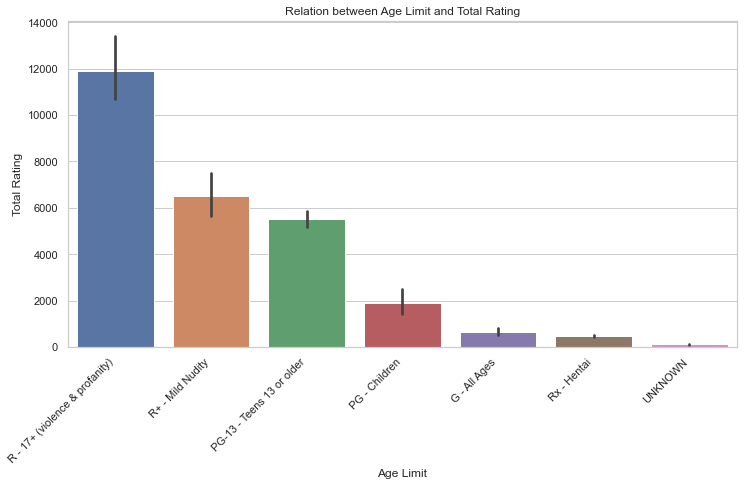

In [41]:
# 재시청 비율 중 가장 선호도가 높은거 17세 이용가(우리로치면 15세 정도?)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='age_limit', y='Total Rating', data=merged_data)

plt.xticks(rotation=45, ha='right')

plt.title('Relation between Age Limit and Total Rating')
plt.xlabel('Age Limit')
plt.ylabel('Total Rating')


plt.show()

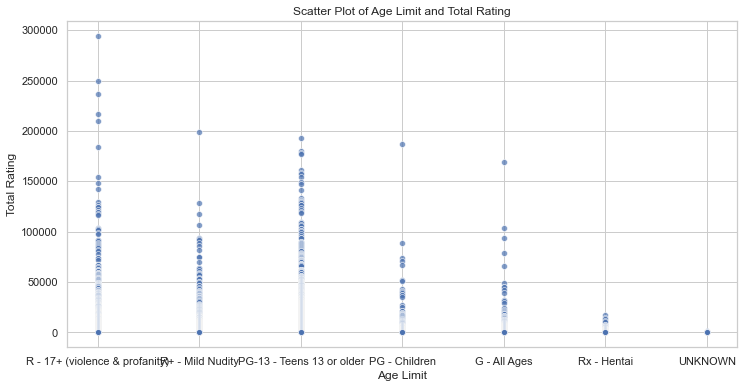

In [42]:
# 산포도로 보면 흥미로운 것은 13세 비율이 점수가 높은 작품이 많이 분포되어있음!

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age_limit', y='Total Rating', data=merged_data, alpha=0.7)

plt.title('Scatter Plot of Age Limit and Total Rating')
plt.xlabel('Age Limit')
plt.ylabel('Total Rating')

# Show the plot
plt.show()

### 장르 관련
Adventure, Comedy, Fantasy, Action, SciFi가 인기

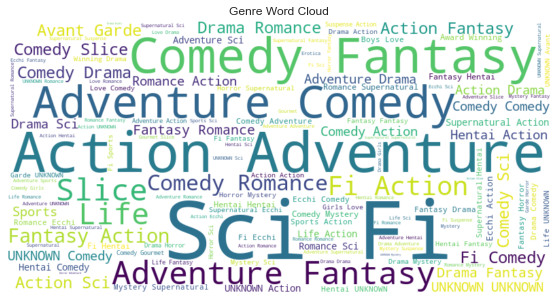

In [43]:
# 장르가 문장으로 이어져있어서 일단 워드클라우드로 뽑아봄. 재시청률이 높은 장르 


# Assuming 'merged_data' is your DataFrame with separate rows for each genre

# Create a string containing all genres
all_genres = ' '.join(merged_data['Genres'].dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

In [44]:
#인기장르 바이너리화. 장르가 문자열로 되어있어서 1,0등으로 표기

selected_genres = ['Adventure', 'Comedy', 'Fantasy', 'Action', 'Sci-Fi']
filtered_data = merged_data[merged_data['Genres'].fillna('').apply(lambda x: any(genre in selected_genres for genre in str(x).split(',')))].reset_index(drop=True)

for genre in selected_genres:
    filtered_data[genre] = filtered_data['Genres'].apply(lambda x: 1 if genre in x.split(', ') else 0)

print(filtered_data)


                                 Anime Title  Number of Users  Total Rating  \
0            Code Geass: Hangyaku no Lelouch            28598        249418   
1                        Fullmetal Alchemist            28270        236980   
2         Code Geass: Hangyaku no Lelouch R2            24498        216500   
3           Fullmetal Alchemist: Brotherhood            23107        210339   
4                                 Elfen Lied            25323        198647   
...                                      ...              ...           ...   
9710                         San Cun Renjian                1             1   
9711                       Arigatou Kumanofu                1             1   
9712            Samchongsa: Time Machine 001                1             1   
9713   Zhu Zhu Xia: Yong Chuang Weilai Cheng                1             1   
9714  Miraesonyeon Kunta Beomyuda 5000 Nyeon                1             1   

                                                Gen

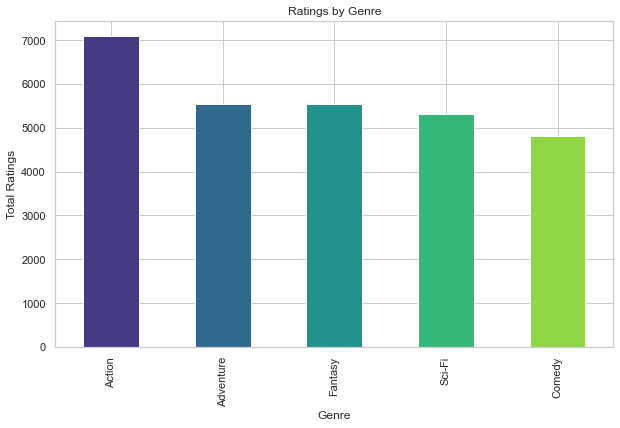

In [46]:
# 장르별 매겨진 점수의 총합. rewatche인 사람들의 모든 점수를 더한 그래프이다. 
# 작품의 개수, 인기도를 종합한 수치를 알 수 있다. 

genre_columns = ['Adventure', 'Comedy', 'Fantasy', 'Action', 'Sci-Fi']
genres_df = filtered_data[genre_columns]
total_ratings_by_genre = genres_df.multiply(filtered_data['Total Rating'], axis=0)
ratings_by_genre = total_ratings_by_genre.sum() / genres_df.sum()

ratings_by_genre_sorted = ratings_by_genre.sort_values(ascending=False)
colors = sns.color_palette('viridis', len(ratings_by_genre_sorted))

ratings_by_genre_sorted.plot(kind='bar', color=colors, figsize=(10, 6))
plt.title('Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Ratings')
plt.show()

### 유저 구성 비율(2023 기준)

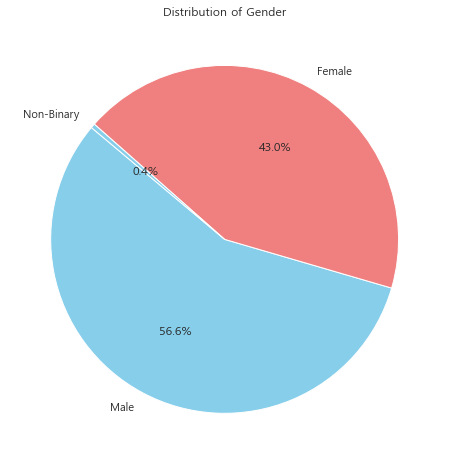

In [67]:
#남녀 구성
gender_counts = user_df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Gender')
plt.show()

In [68]:
#년도만 추출해서 그림

user_df['Birth Year'] = user_df['Birthday'].str[:4]
birth_user_df = user_df[['Username', 'Gender', 'Birth Year']]
print(birth_user_df)

          Username  Gender Birth Year
0            Xinil    Male       1985
1          Aokaado    Male        NaN
2          Crystal  Female        NaN
3           Arcane     NaN        NaN
4              Mad     NaN        NaN
...            ...     ...        ...
731285      Dolopa     NaN        NaN
731286  alenrobnik     NaN        NaN
731287   Oblongata     NaN       1993
731288      Etnota     NaN        NaN
731289  JuunanaSai  Female        NaN

[731290 rows x 3 columns]


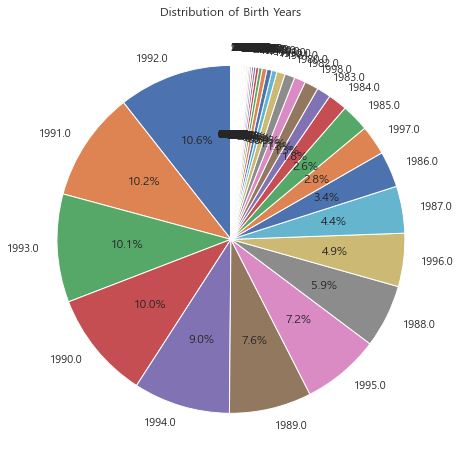

In [69]:
birth_years = birth_user_df['Birth Year'].astype(float)  
plt.figure(figsize=(8, 8))
birth_years.value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Birth Years')
plt.ylabel('')  
plt.show()

In [70]:
# 예외 변수 확인
print(birth_user_df['Birth Year'].unique())

['1985' nan '1988' '1990' '1983' '1991' '1989' '1986' '1996' '1982' '1984'
 '1987' '1978' '1992' '1998' '1981' '1979' '1963' '1977' '1930' '2006'
 '1975' '1972' '1939' '1993' '1994' '1980' '1976' '1974' '1995' '1931'
 '1968' '2004' '2007' '1973' '2019' '1997' '0001' '2021' '1970' '1944'
 '1932' '1955' '1965' '2001' '2010' '1957' '1964' '2016' '1941' '1967'
 '1933' '2009' '1969' '1934' '1966' '2005' '1971' '2000' '2014' '2011'
 '1956' '1999' '1942' '1938' '2008' '2012' '1900' '2002' '1959' '1961'
 '2020' '1946' '2003' '1950' '2013' '1951' '1962' '1960' '1954' '2017'
 '1952' '1958' '1949' '1936' '1953' '1943' '1937' '1945' '1947' '2023'
 '1712' '2024' '1321' '1000' '1948' '2018' '1851' '2015' '1337' '2022'
 '1940' '1800' '1935' '1730' '0666' '2100' '1886' '0097']


In [71]:
birth_user_df['Birth Year'] = pd.to_numeric(birth_user_df['Birth Year'].str.replace(r'\D+', ''), errors='coerce')


birth_user_df['Generation'] = pd.cut(
    birth_user_df['Birth Year'],
    bins=[-np.inf, 1985, 1990, 1995, 2000, np.inf],
    labels=['Gen Adult', 'Gen(85~90)', 'Gen(91~95)', 'Gen(96~00)', 'Gen Z'],
    right=False
)

# Display the filtered DataFrame with only the relevant columns
print(birth_user_df[['Username', 'Gender', 'Birth Year', 'Generation']])

          Username  Gender  Birth Year  Generation
0            Xinil    Male      1985.0  Gen(85~90)
1          Aokaado    Male         NaN         NaN
2          Crystal  Female         NaN         NaN
3           Arcane     NaN         NaN         NaN
4              Mad     NaN         NaN         NaN
...            ...     ...         ...         ...
731285      Dolopa     NaN         NaN         NaN
731286  alenrobnik     NaN         NaN         NaN
731287   Oblongata     NaN      1993.0  Gen(91~95)
731288      Etnota     NaN         NaN         NaN
731289  JuunanaSai  Female         NaN         NaN

[731290 rows x 4 columns]


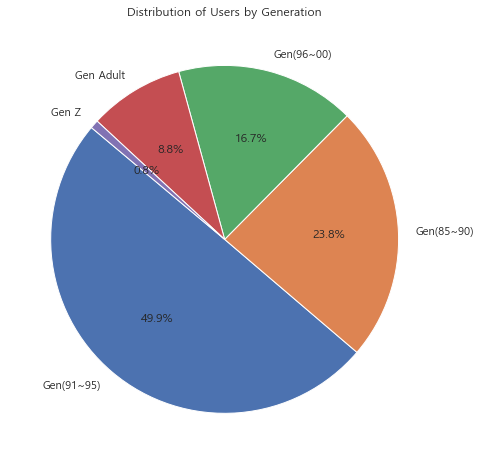

In [72]:
# 91~95년생이 가장 많다
gen_counts = birth_user_df['Generation'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gen_counts, labels=gen_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Users by Generation')
plt.show()

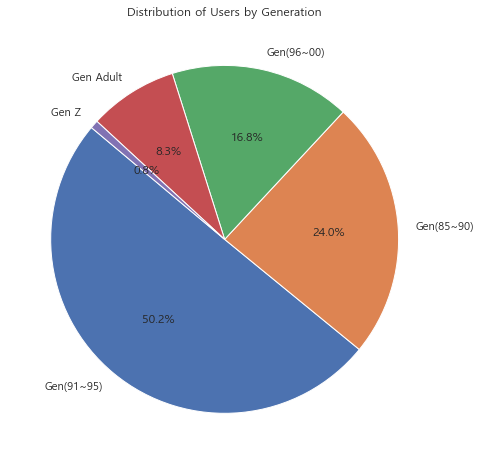

In [73]:
# 생일 이상하게 입력한 애들 검열한거(1950보다 오래 된 사람, 2015보다 최근 인 사람 검열. 근데 크게 안달라진다

filtered_birth_user_df = birth_user_df[(birth_user_df['Birth Year'] >= 1950) & (birth_user_df['Birth Year'] <= 2015)]
generation_counts = filtered_birth_user_df['Generation'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(generation_counts, labels=generation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Users by Generation')
plt.show()

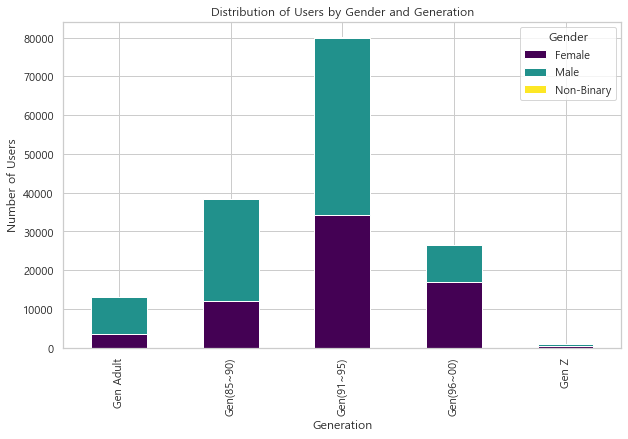

In [74]:
# 성별과 나이 구성. 보기 편한거 중 아무거나

filtered_birth_user_df = birth_user_df[(birth_user_df['Birth Year'] >= 1950) & (birth_user_df['Birth Year'] <= 2015)]

gender_generation_counts = filtered_birth_user_df.groupby(['Generation', 'Gender']).size().unstack(fill_value=0)

gender_generation_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribution of Users by Gender and Generation')
plt.xlabel('Generation')
plt.ylabel('Number of Users')
plt.legend(title='Gender', loc='upper right')
plt.show()

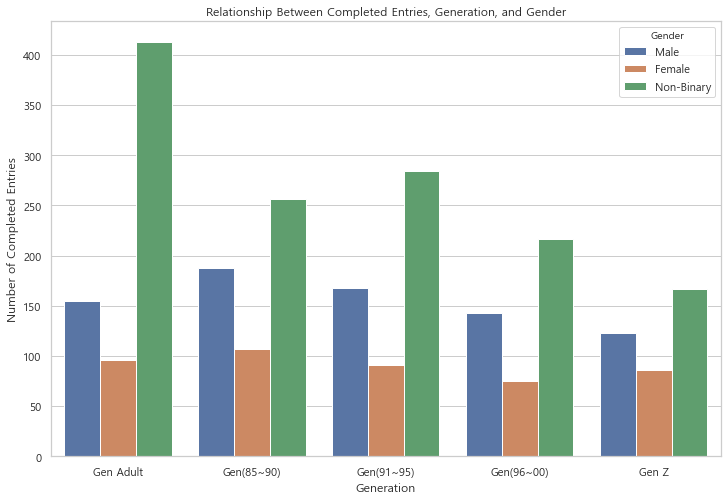

In [75]:
# 나이, 연령 대비 completed한 작품 수
# 이사이트 구성 비율을 생각하면 91~95는 다 본 수가 많지는 않다. watching수로 해보자
user_df['Birth Year'] = pd.to_numeric(user_df['Birth Year'], errors='coerce')

filtered_user_df = user_df[(user_df['Birth Year'] >= 1950) & (user_df['Birth Year'] <= 2015)]

filtered_user_df['Generation'] = pd.cut(
    filtered_user_df['Birth Year'],
    bins=[-np.inf, 1985, 1990, 1995, 2000, np.inf],
    labels=['Gen Adult', 'Gen(85~90)', 'Gen(91~95)', 'Gen(96~00)', 'Gen Z'],
    right=False
)

plt.figure(figsize=(12, 8))
sns.barplot(x='Generation', y='Completed', hue='Gender', data=filtered_user_df, ci=None)

plt.xlabel('Generation')
plt.ylabel('Number of Completed Entries')
plt.title('Relationship Between Completed Entries, Generation, and Gender')

plt.show()

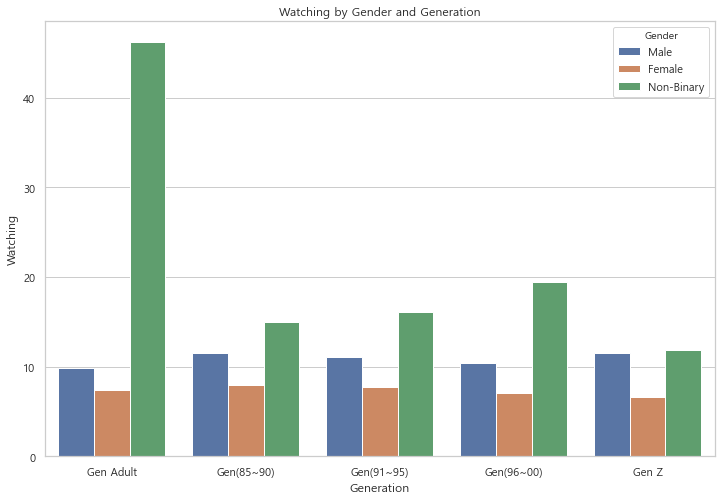

In [76]:
# 보고있는 만화의 개수도 adult가 높다

filtered_user_df = user_df[(user_df['Birth Year'] >= 1950) & (user_df['Birth Year'] <= 2015)]

filtered_user_df['Generation'] = pd.cut(
    filtered_user_df['Birth Year'],
    bins=[-np.inf, 1985, 1990, 1995, 2000, np.inf],
    labels=['Gen Adult', 'Gen(85~90)', 'Gen(91~95)', 'Gen(96~00)', 'Gen Z'],
    right=False
)


plt.figure(figsize=(12, 8))
sns.barplot(x='Generation', y='Watching', hue='Gender', data=filtered_user_df, ci=None)


plt.xlabel('Generation')
plt.ylabel('Watching')
plt.title('Watching by Gender and Generation')


plt.show()

### 원작의 유무와 인기도 비교
- source와 favorites로 보는 인기도 비교

In [77]:
selected_columns = ['MAL_ID', 'Name', 'Score', 'Genres', 'Source', 'Ranked', 'Favorites']

selected_df = df[selected_columns]
selected_df

,MAL_ID,Name,Score,Genres,Source,Ranked,Favorites
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Original,28.0,61971
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Original,159.0,1174
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Manga,266.0,12944
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Original,2481.0,587
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Manga,3710.0,18
...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Novel,Unknown,6
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Manga,Unknown,70
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Visual novel,Unknown,48
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Manga,Unknown,2


In [78]:
#원작 유무를 알 수 없는 작품들은 제거하였다. 약 4만개가 제거 되었다
selected_df = selected_df[selected_df['Source'] != 'Unknown']
selected_df

,MAL_ID,Name,Score,Genres,Source,Ranked,Favorites
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Original,28.0,61971
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Original,159.0,1174
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Manga,266.0,12944
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Original,2481.0,587
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Manga,3710.0,18
...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Novel,Unknown,6
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Manga,Unknown,70
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Visual novel,Unknown,48
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Manga,Unknown,2


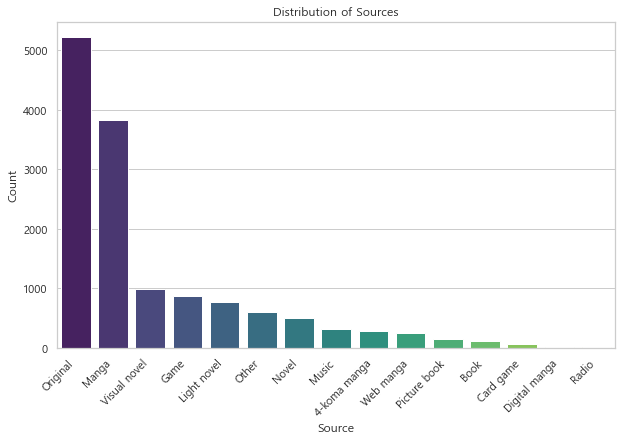

In [79]:
# 원작 분포 확인
source_counts = selected_df['Source'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.index, y=source_counts.values, palette='viridis')
plt.title('Distribution of Sources')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.show()

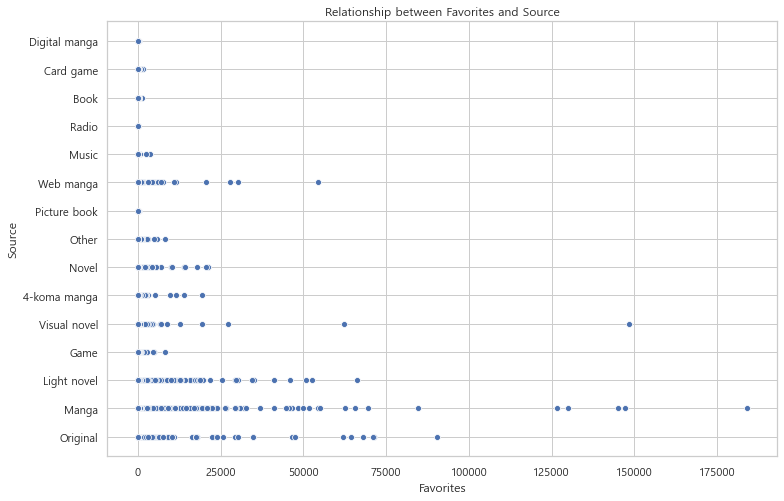

In [80]:
# 원작에 대해 favorites 수
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Favorites', y='Source', data=selected_df, palette='viridis')
plt.title('Relationship between Favorites and Source')
plt.xlabel('Favorites')
plt.ylabel('Source')
plt.show()

### favorite의 작품들을 보기 좋게 나열한 동적 그래프
- 주피터에서 안돌아가서 colab 링크를 첨부합니다
- https://colab.research.google.com/drive/186cWkkSLE6awluN_pqrzFKCQTjQbQvkY?usp=sharing
- 동일한 결과를 이유경 학우님 주피터 노트에 첨부해두었습니다!

### 결론
- 에피소드 수가 적고(10~20화 정도)
- 판타지 장르이며
- 라이센서 및 스튜디오
- 출처는 라노벨이 가장 좋다

In [83]:
# 이유경 학우의 코드를 참고한 해당하는 작품 가져오는 코드. 
Anime = pd.read_csv('archive2020/anime.csv',  encoding='UTF-8')

In [84]:
# 정수화했음. unknown은 Nan
Anime['Episodes'] = pd.to_numeric(Anime['Episodes'], errors='coerce', downcast='integer')

#score 문자열 -> 실수화. unknown = Nan
Anime['Score'] = pd.to_numeric(Anime['Score'], errors='coerce')
Anime['Score']

0        8.78
1        8.39
2        8.24
3        7.27
4        6.98
         ... 
17557     NaN
17558     NaN
17559     NaN
17560     NaN
17561     NaN
Name: Score, Length: 17562, dtype: float64

In [86]:
#점수 조건 추가. 퍼니메이션의 TV, 원작은 만화인 20화 아래의 작품 찾기. 점수는 7.8 미만

licensor_condition = Anime['Licensors'] == 'Funimation'
type_condition = Anime['Type'] == 'TV'
source_condition = Anime['Source'] == 'Manga'
episodes_condition = Anime['Episodes'] < 20
score_condition = Anime['Score'] > 7.8

# Combine conditions using the AND (&) operator
combined_condition = licensor_condition & type_condition & source_condition & episodes_condition & score_condition

# Retrieve rows that satisfy the conditions
result = Anime[combined_condition]

print(result['Name'], result['Score'].head(15))

5238                               Kuragehime
6491                     Sekaiichi Hatsukoi 2
6748                               Jormungand
6952                Jormungand: Perfect Order
7167                   Kamisama Hajimemashita
8292                                 Noragami
8606                  Ping Pong the Animation
8608             Kuroshitsuji: Book of Circus
8646                              Tokyo Ghoul
9374                  Kamisama Hajimemashita◎
9383              Shingeki no Kyojin Season 2
10573                        Noragami Aragoto
10853    Akagami no Shirayuki-hime 2nd Season
10914                                Drifters
11185                   Boku no Hero Academia
11779        Kobayashi-san Chi no Maid Dragon
12430                  Kekkai Sensen & Beyond
13252             Shingeki no Kyojin Season 3
13370                            Golden Kamuy
13540                             Hinamatsuri
14621                 Golden Kamuy 2nd Season
14705                        Kono 

### 결론으로 나온 작품들 워드클라우드


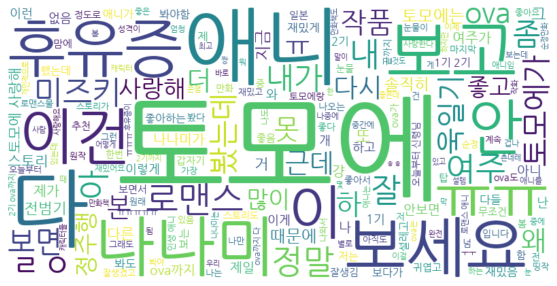

In [87]:
excel_file = '오늘부터신령님.xlsx'

df = pd.read_excel(excel_file)

korean_text = ' '.join(df['LABEL-5'].astype(str).fillna(''))

wordcloud = WordCloud(
    font_path='NanumGothic.ttf',  
    width=800,
    height=400,
    background_color='white'
).generate(korean_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

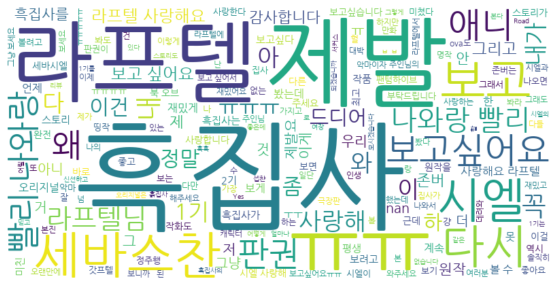

In [88]:
#인기있어서 들여왔는데 안들여와서 간절한 흑집사 후기

excel_file = '흑집사.xlsx'
df = pd.read_excel(excel_file)
korean_text = ' '.join(df['LABEL-5'].astype(str).fillna(''))

wordcloud = WordCloud(
    font_path='NanumGothic.ttf', 
    width=800,
    height=400,
    background_color='white'
).generate(korean_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

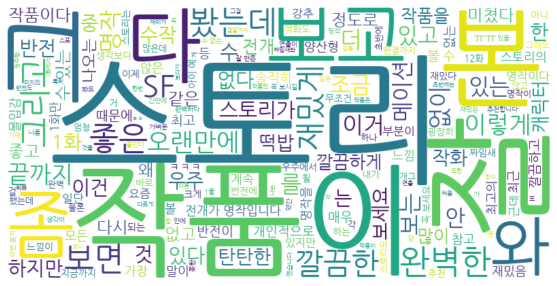

In [89]:
#잘모르지만 명작이라는 평이 많은 만화 워드클라우드

excel_file = '아스트라.xlsx'
df = pd.read_excel(excel_file)


korean_text = ' '.join(df['LABEL-5'].astype(str).fillna(''))

wordcloud = WordCloud(
    font_path='NanumGothic.ttf', 
    width=800,
    height=400,
    background_color='white'
).generate(korean_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

(-0.5, 799.5, 399.5, -0.5)

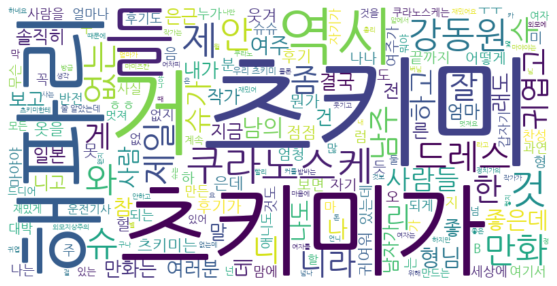

In [90]:
#한국에 없는 해파리공주 -> 한국에서 이미 인기가 많았다는 적중률?

excel_file = '해파리공주kakao.xlsx'
df = pd.read_excel(excel_file)


korean_text = ' '.join(df['LABEL-5'].astype(str).fillna(''))

wordcloud = WordCloud(
    font_path='NanumGothic.ttf', 
    width=800,
    height=400,
    background_color='white'
).generate(korean_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### ===== 이하 공백 ======